In [126]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [127]:
data = pd.read_csv('Dataset-Mental-Disorders.csv')

In [128]:
data

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [129]:
category_mapping = {
    "Seldom": 1,
    "Sometimes": 2,
    "Usually": 3,
    "Most-Often": 4
}

data["Sadness"] = data["Sadness"].map(category_mapping)
data["Euphoric"] = data["Euphoric"].map(category_mapping)
data["Exhausted"] = data["Exhausted"].map(category_mapping)
data["Sleep dissorder"] = data["Sleep dissorder"].map(category_mapping)

for col in ["Sadness", "Euphoric", "Exhausted","Sleep dissorder"] :
    data[col] = data[col] * 2.5


for col in ["Sexual Activity", "Concentration", "Optimisim"]:
    data[col] = data[col].str.extract('(\d+)').astype(int)

yes_no_columns = ["Mood Swing", "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation", 
                  "Aggressive Response", "Ignore & Move-On", "Nervous Break-down", "Admit Mistakes", "Overthinking"]

for col in yes_no_columns:
    data[col] = data[col].map({"YES": 1, "NO": 0})

In [130]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      1
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


In [131]:
data

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,7.5,2.5,5.0,5.0,1,NaN,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,7.5,2.5,7.5,5.0,0,1.0,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,5.0,10.0,5.0,5.0,1,0.0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,7.5,2.5,7.5,10.0,1,1.0,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,7.5,7.5,5.0,5.0,0,0.0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,10.0,2.5,7.5,5.0,0,1.0,0,0,1,0,1,0,0,1,2,5,3,Depression
116,Patiant-117,5.0,5.0,5.0,2.5,1,0.0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
117,Patiant-118,7.5,5.0,7.5,5.0,1,0.0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2
118,Patiant-119,7.5,5.0,2.5,2.5,0,1.0,1,0,1,1,1,0,1,1,7,7,7,Depression


In [122]:
grouped = data.groupby("Expert Diagnose").mean()

In [123]:
grouped

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
Expert Diagnose,,,,,,,,,,,,,,,,,
Bipolar Type-1,1.928571,2.428571,2.285714,2.642857,0.892857,0.392857,0.535714,0.214286,0.535714,0.857143,0.178571,0.571429,0.321429,0.535714,1.633929,0.955357,1.553571
Bipolar Type-2,3.000000,1.483871,2.806452,2.645161,1.000000,0.733333,0.451613,0.483871,0.483871,0.451613,0.451613,0.709677,0.483871,0.548387,0.854839,0.854839,0.806452
Depression,3.258065,1.387097,3.193548,2.645161,0.000000,0.677419,0.322581,0.193548,0.419355,0.290323,0.483871,0.580645,0.516129,0.741935,1.016129,1.153226,0.790323
Normal,1.933333,2.500000,2.200000,1.900000,0.033333,0.066667,0.233333,0.666667,0.466667,0.366667,0.533333,0.200000,0.633333,0.333333,1.283333,1.283333,1.366667


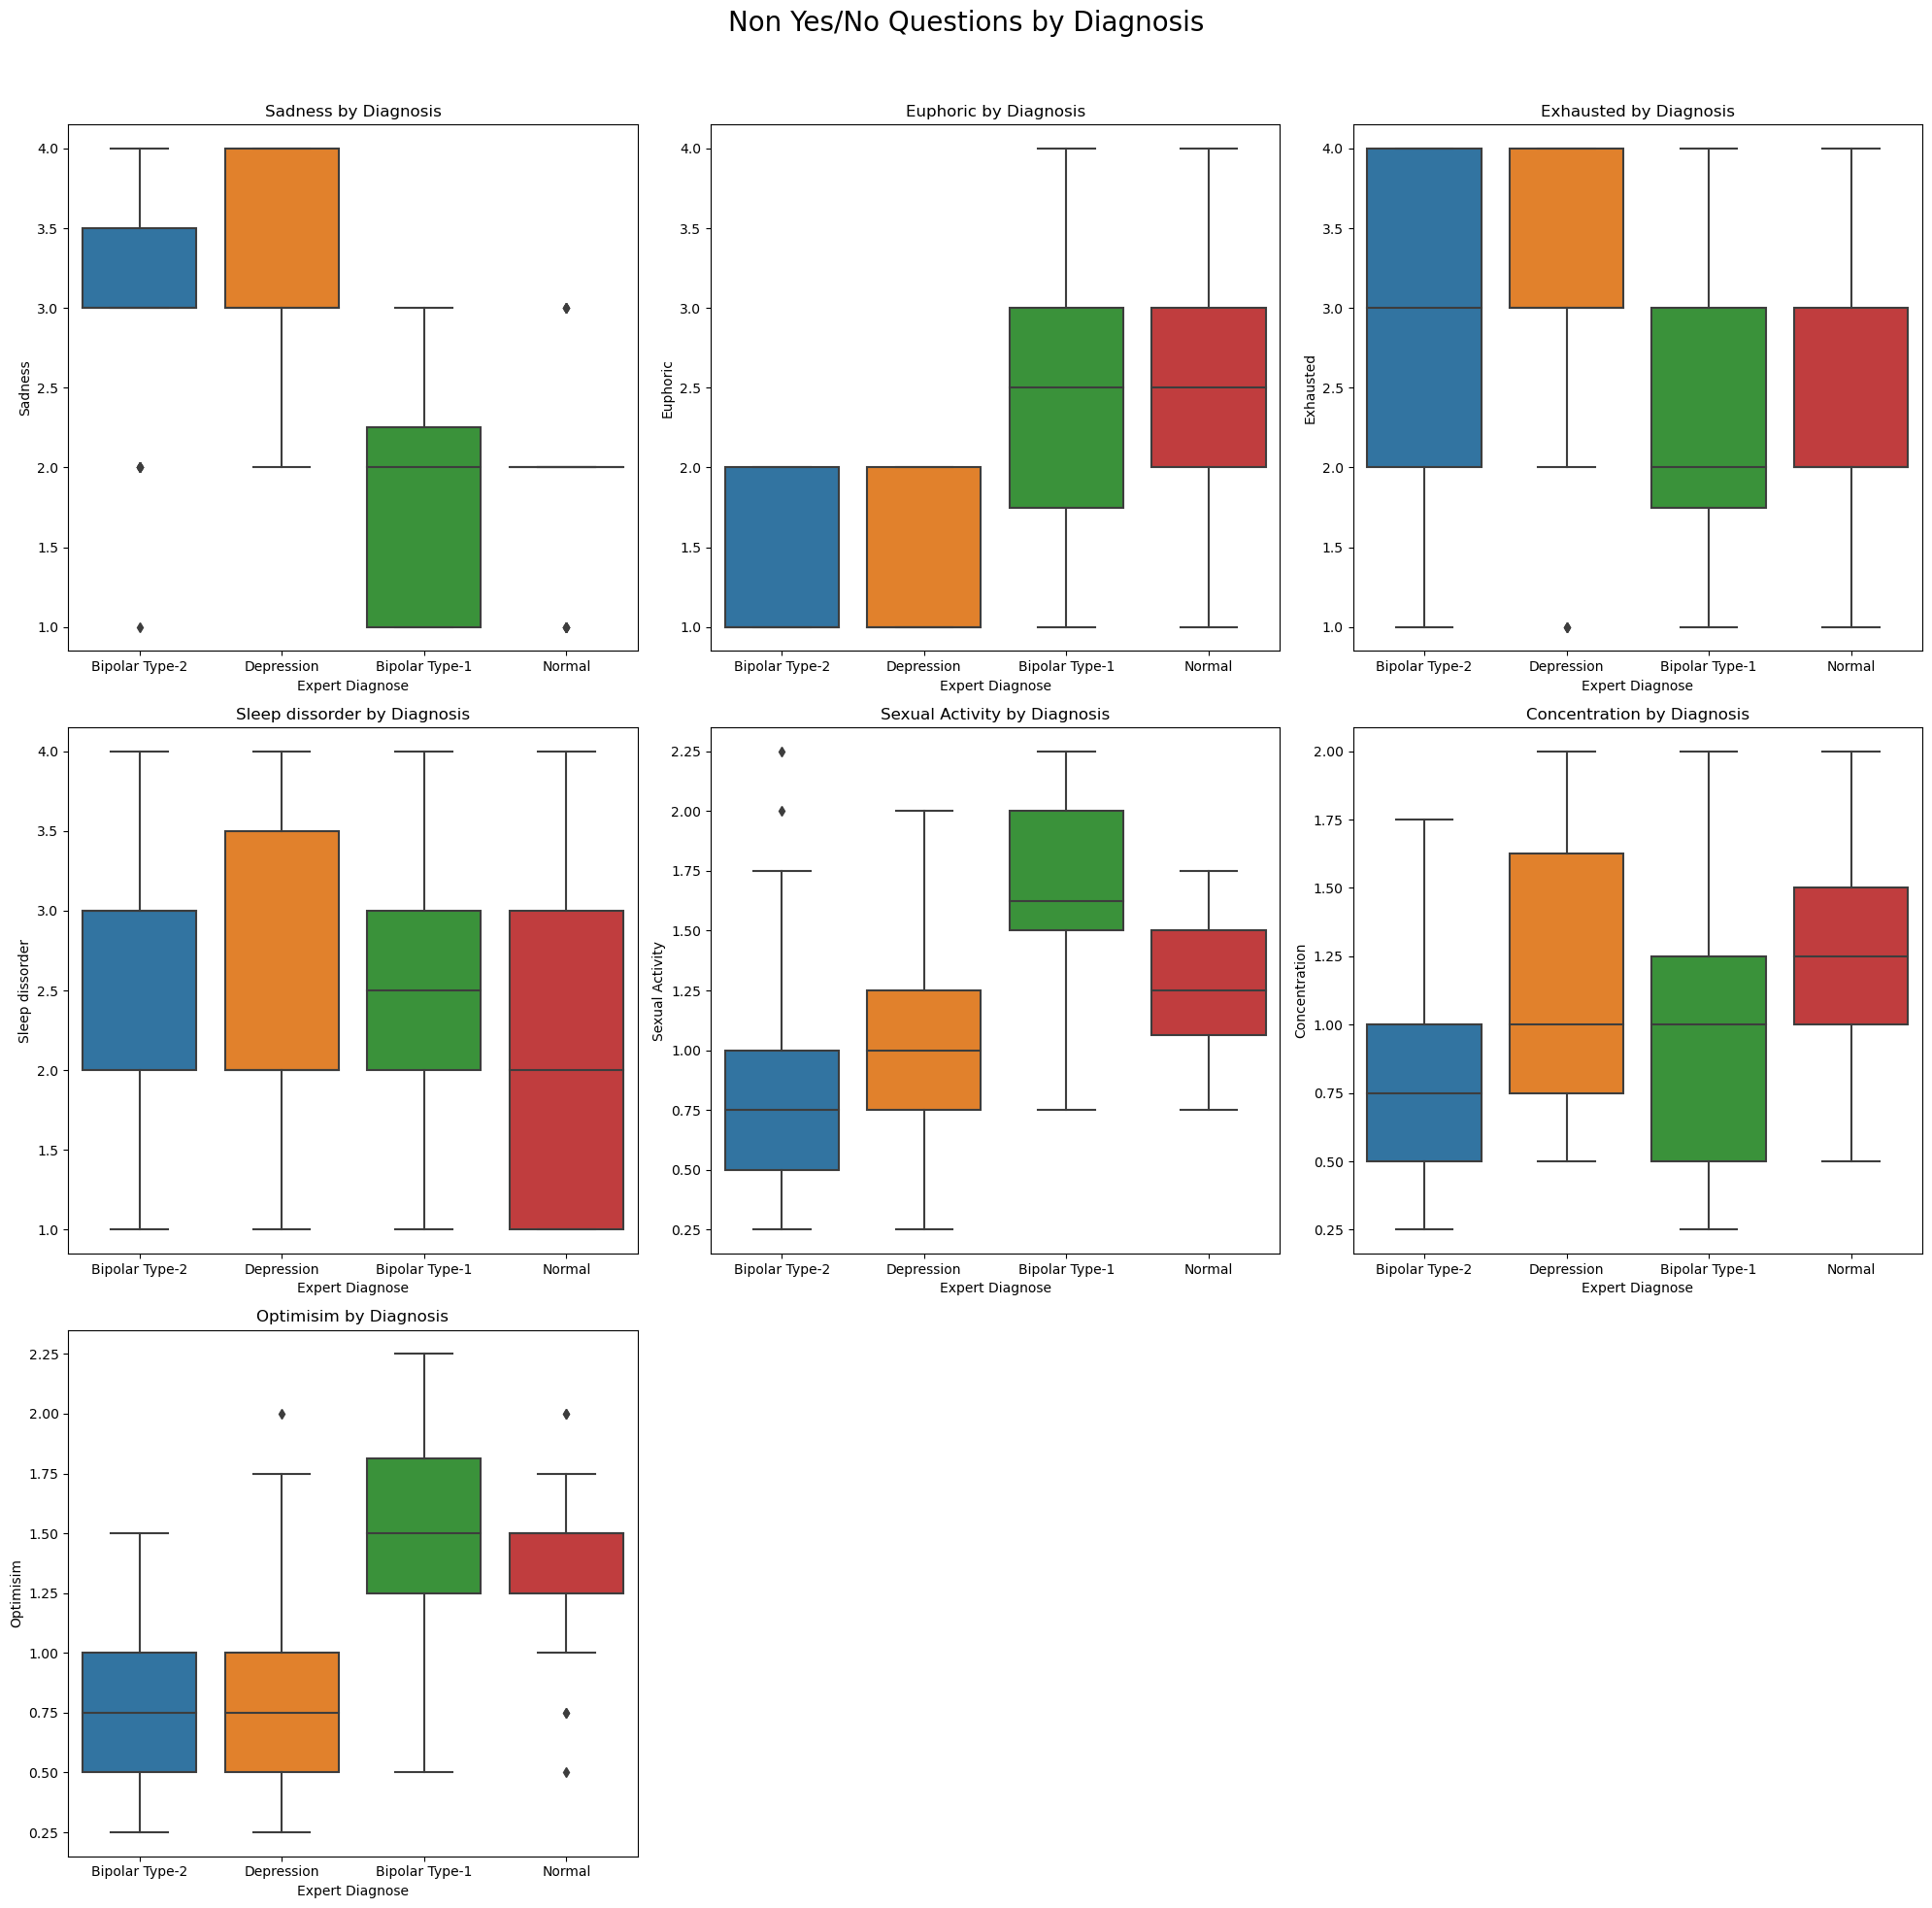

In [124]:
non_yes_no_columns = ["Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Sexual Activity", "Concentration", "Optimisim"]

fig, axes = plt.subplots(nrows=(len(non_yes_no_columns) + 2) // 3, ncols=3, figsize=(20, 20))
fig.suptitle('Non Yes/No Questions by Diagnosis', fontsize=20)

for i, col in enumerate(non_yes_no_columns):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=data, x='Expert Diagnose', y=col, ax=ax)
    ax.set_title(f'{col} by Diagnosis')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

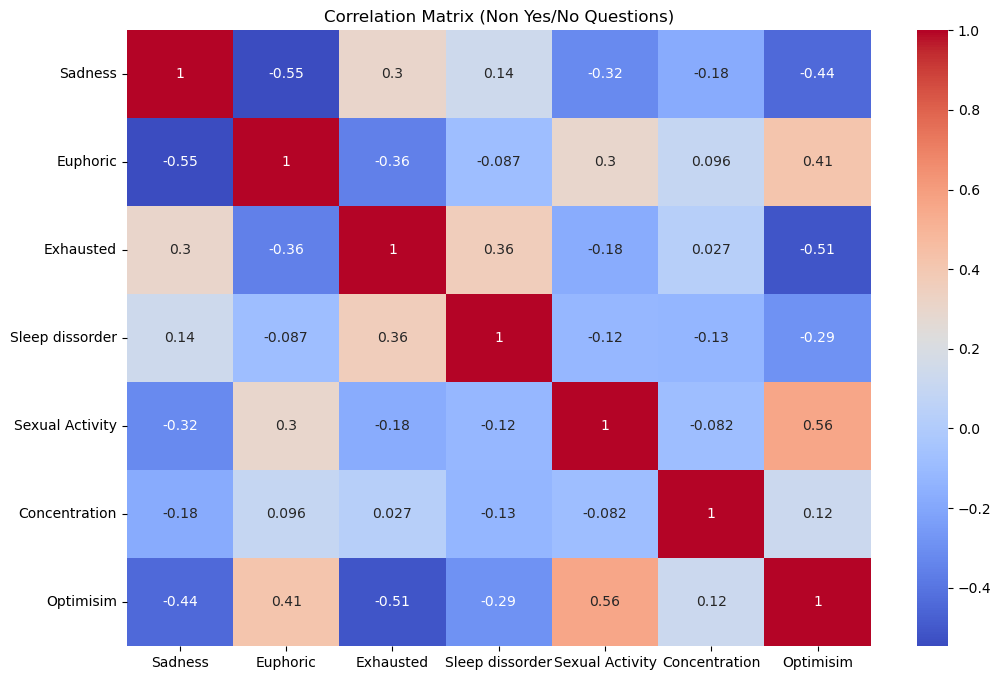

In [125]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[non_yes_no_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Non Yes/No Questions)')
plt.show()

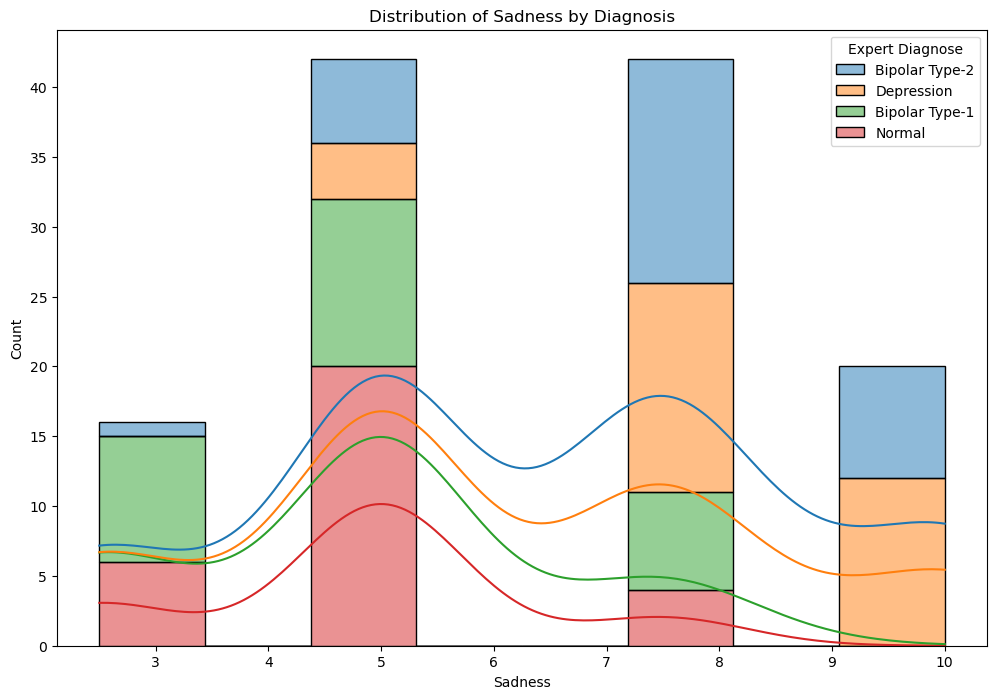

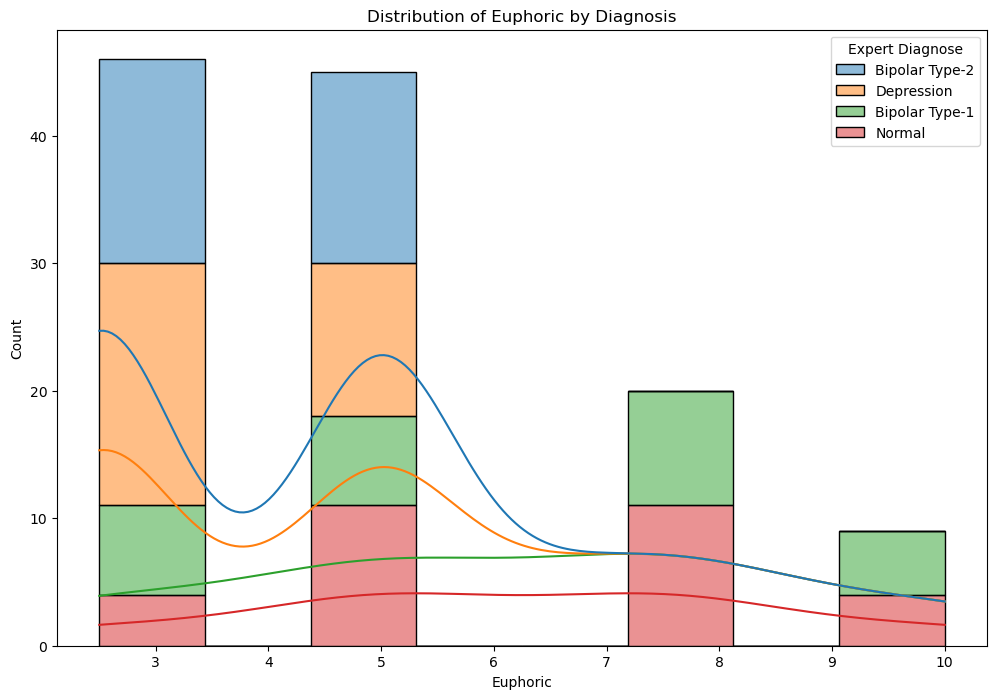

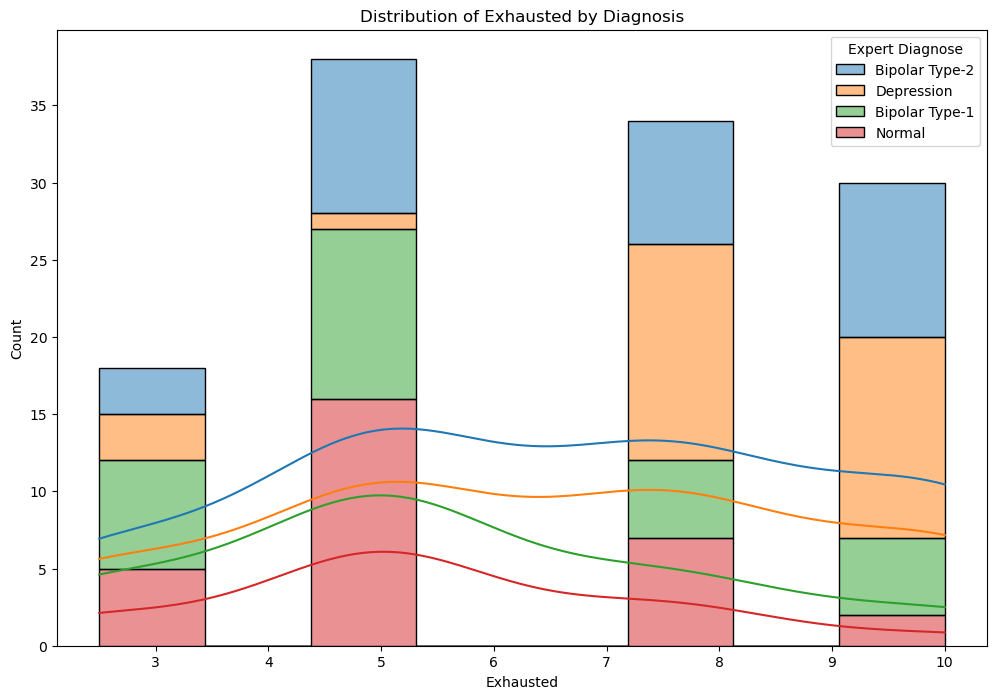

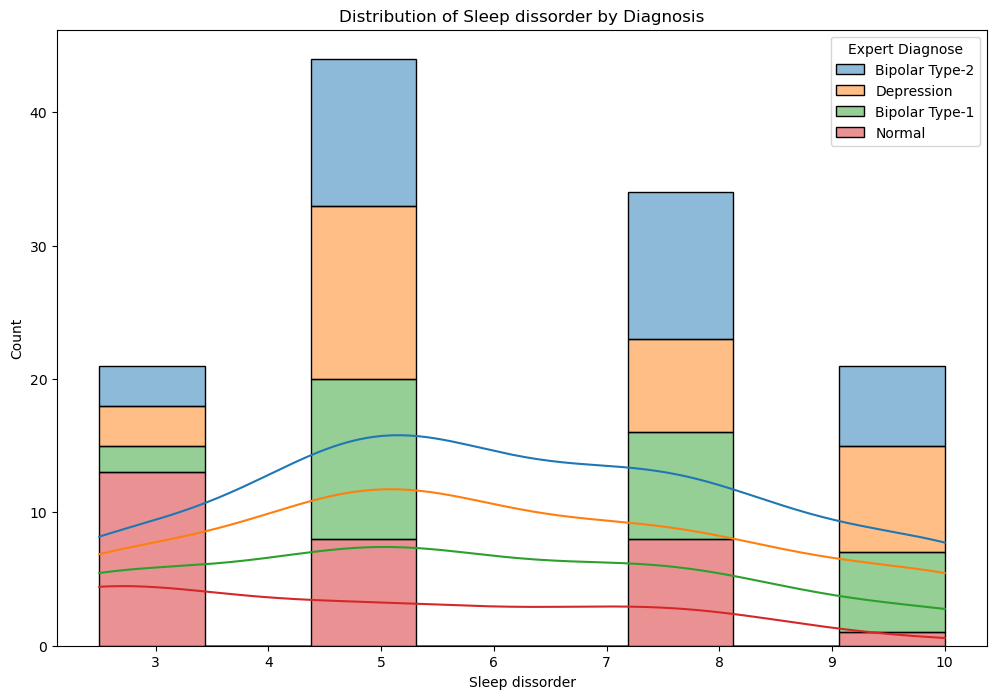

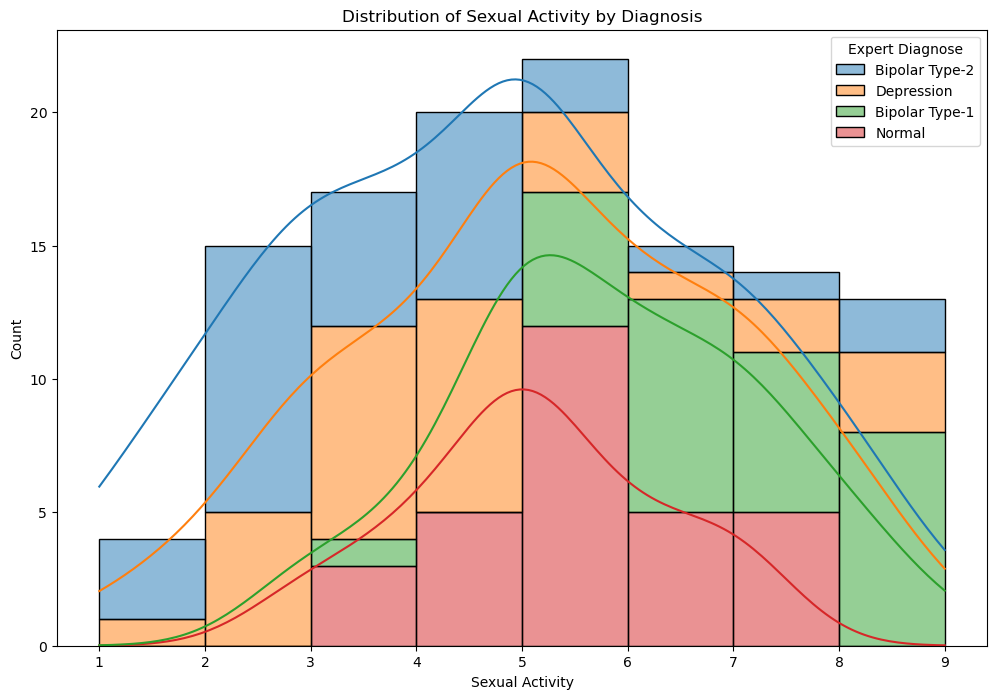

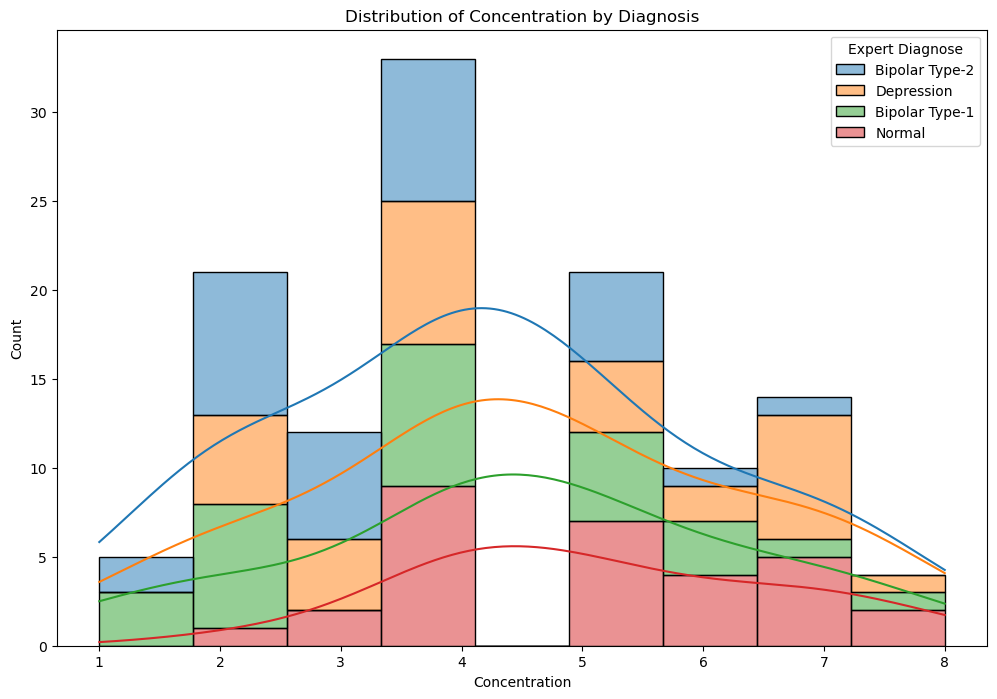

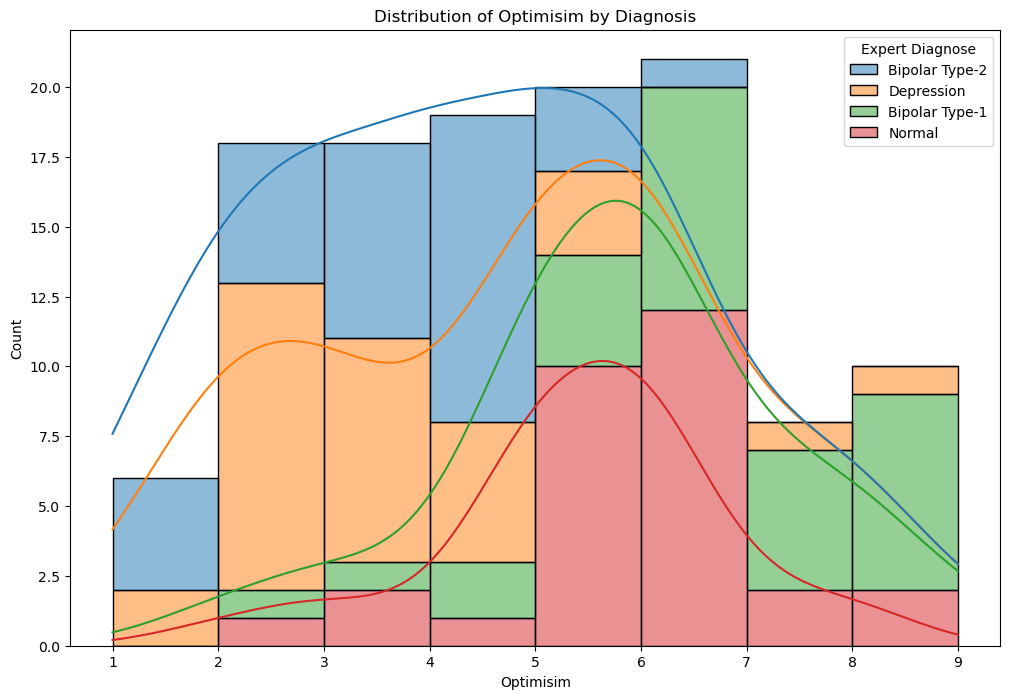

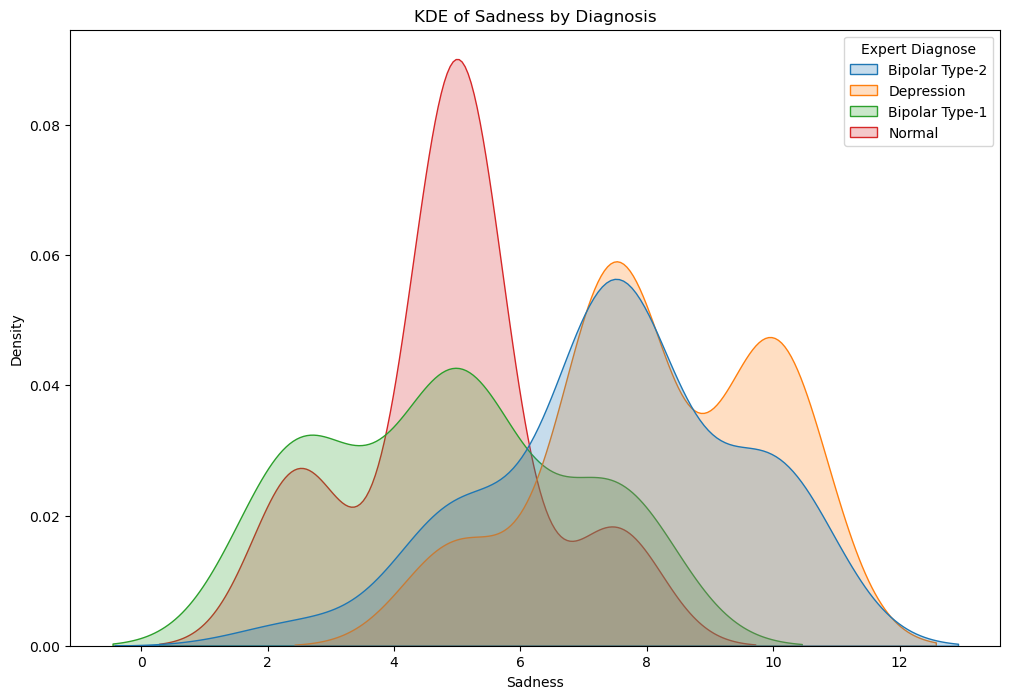

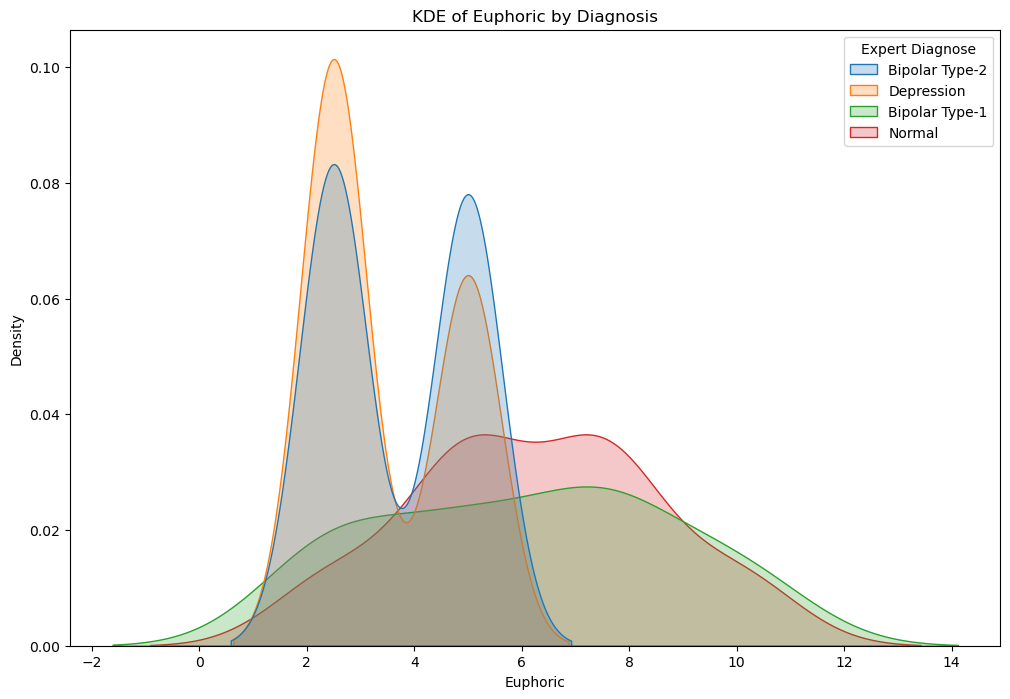

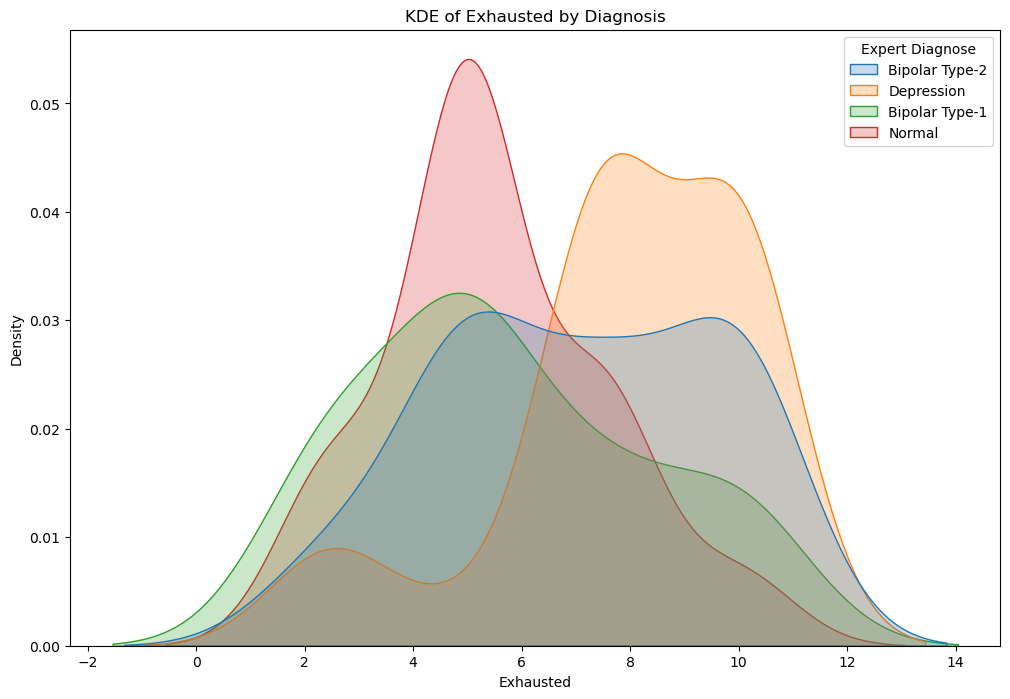

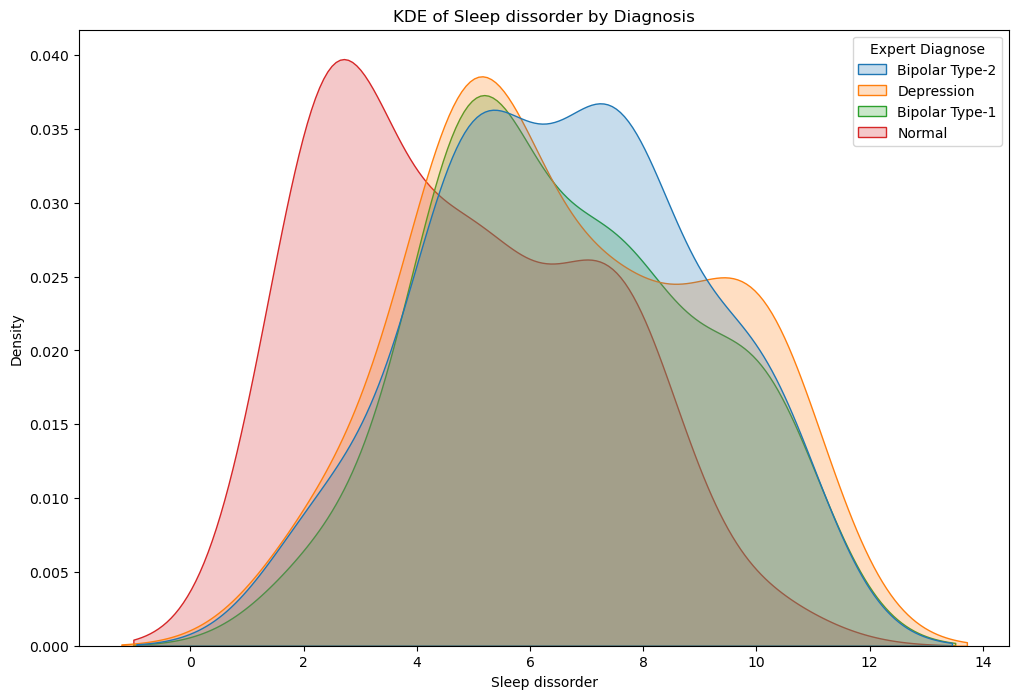

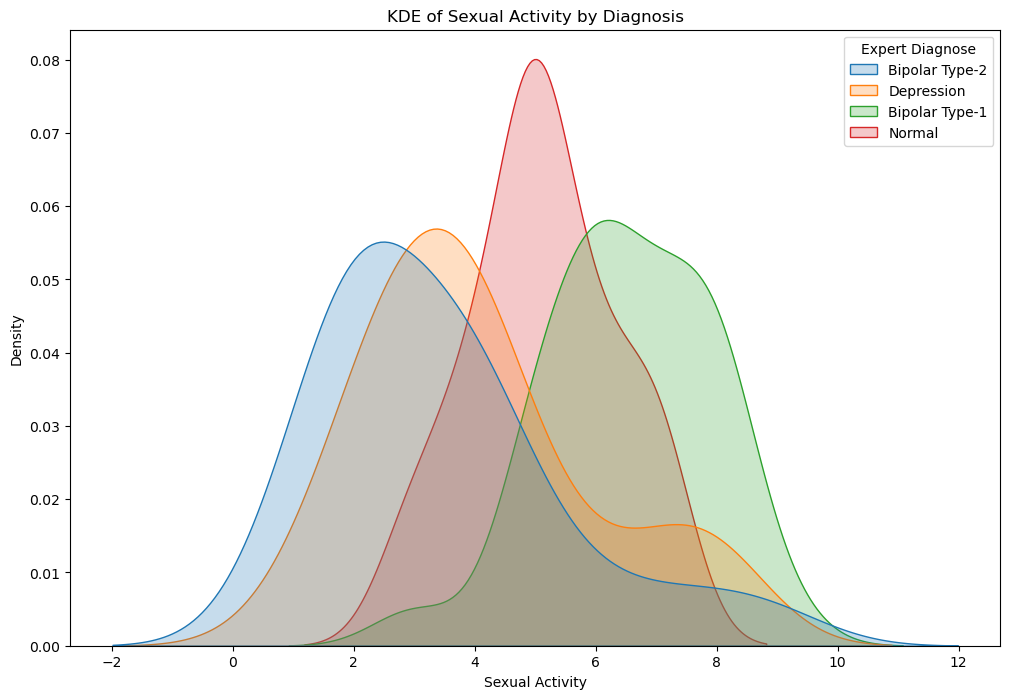

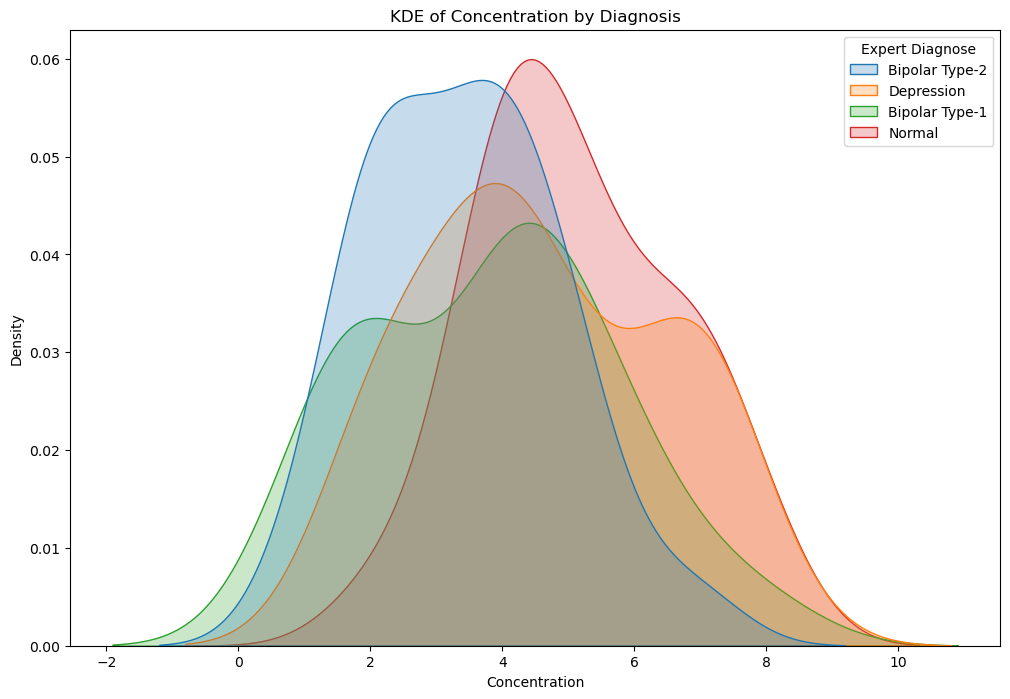

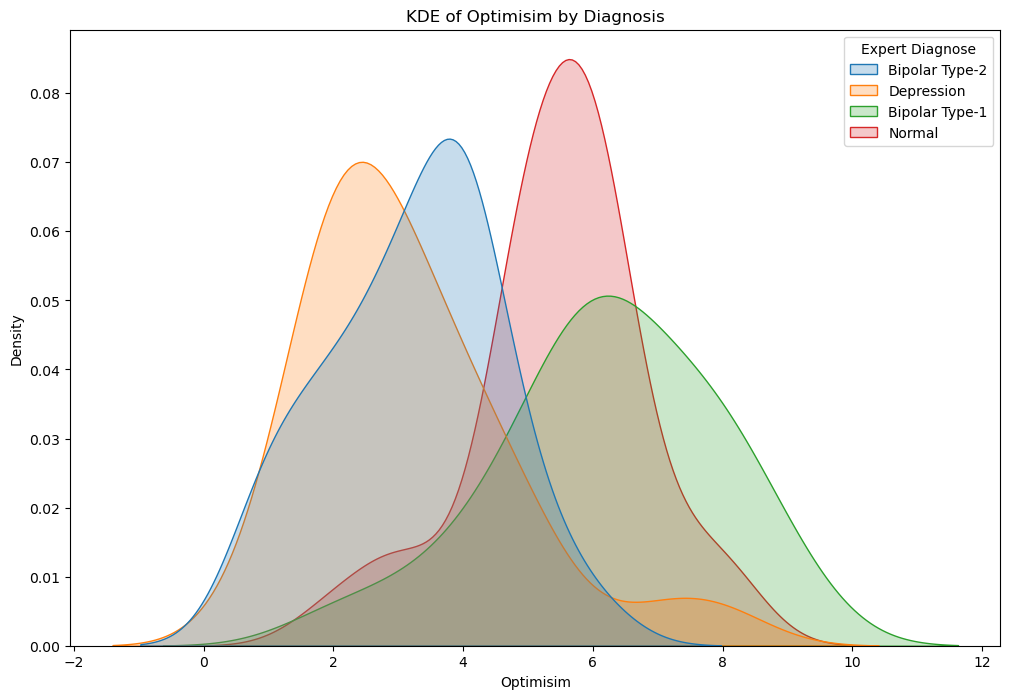

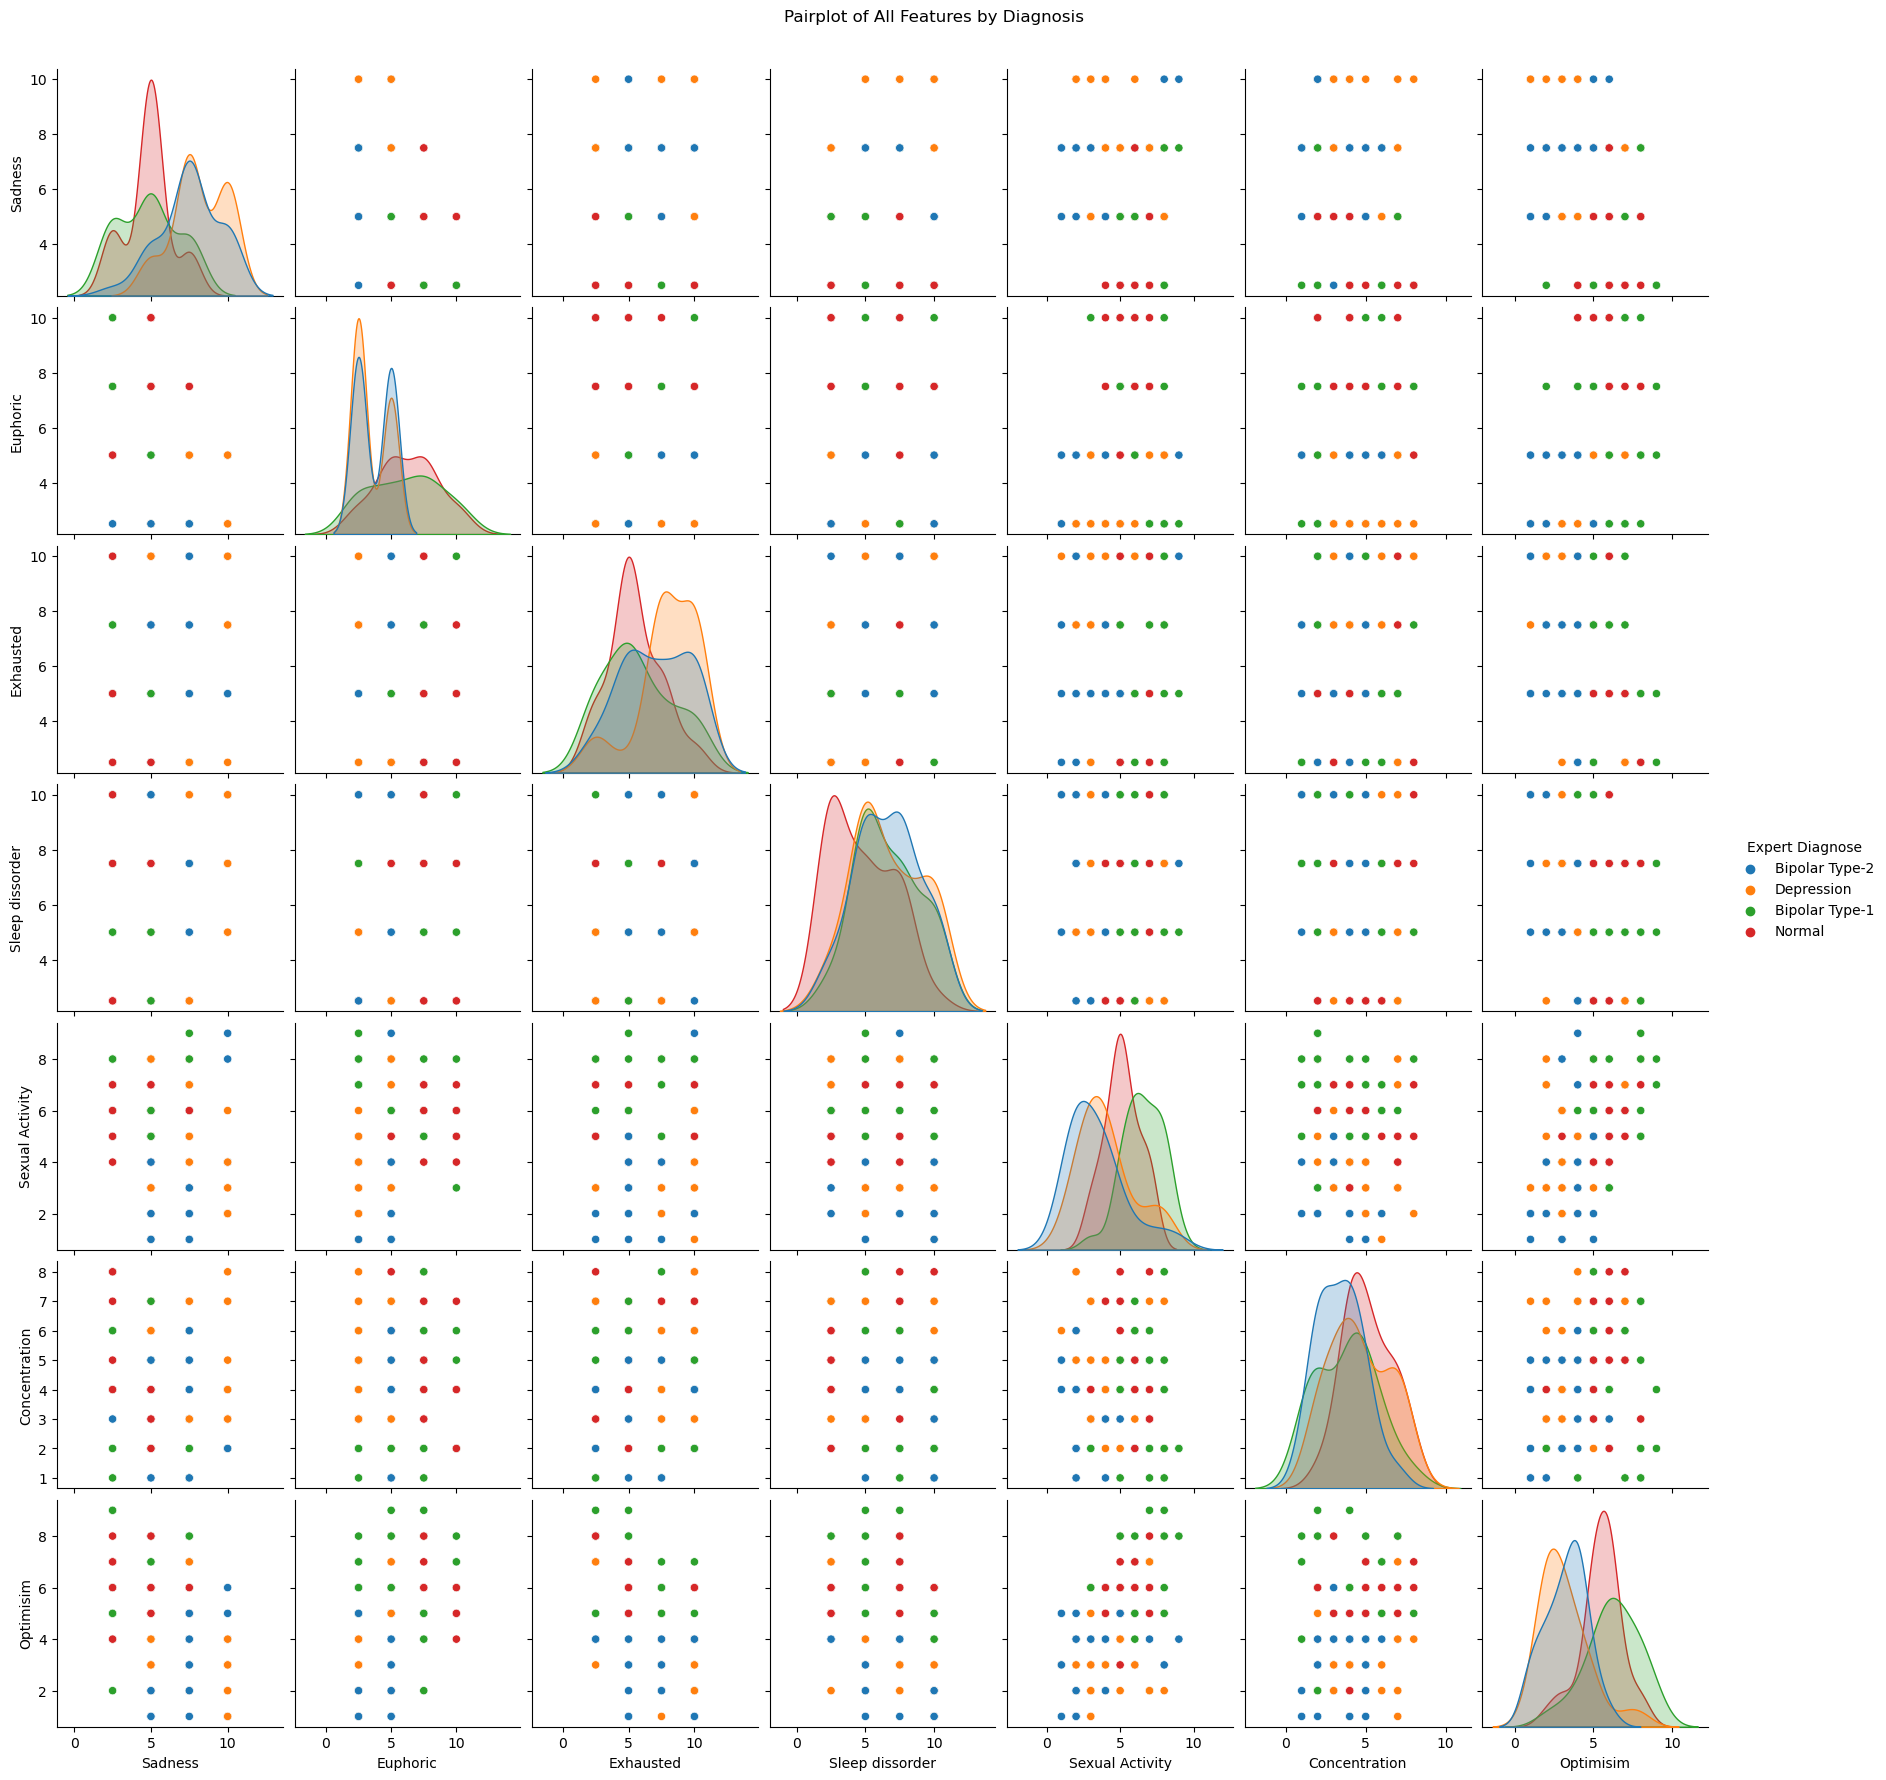

In [133]:
for col in non_yes_no_columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(data=data, x=col, hue='Expert Diagnose', multiple="stack", kde=True)
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.show()

for col in non_yes_no_columns:
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=data, x=col, hue='Expert Diagnose', fill=True)
    plt.title(f'KDE of {col} by Diagnosis')
    plt.show()

sns.pairplot(data[non_yes_no_columns + ['Expert Diagnose']], hue='Expert Diagnose', diag_kind="kde")
plt.suptitle('Pairplot of All Features by Diagnosis', y=1.02)
plt.show()

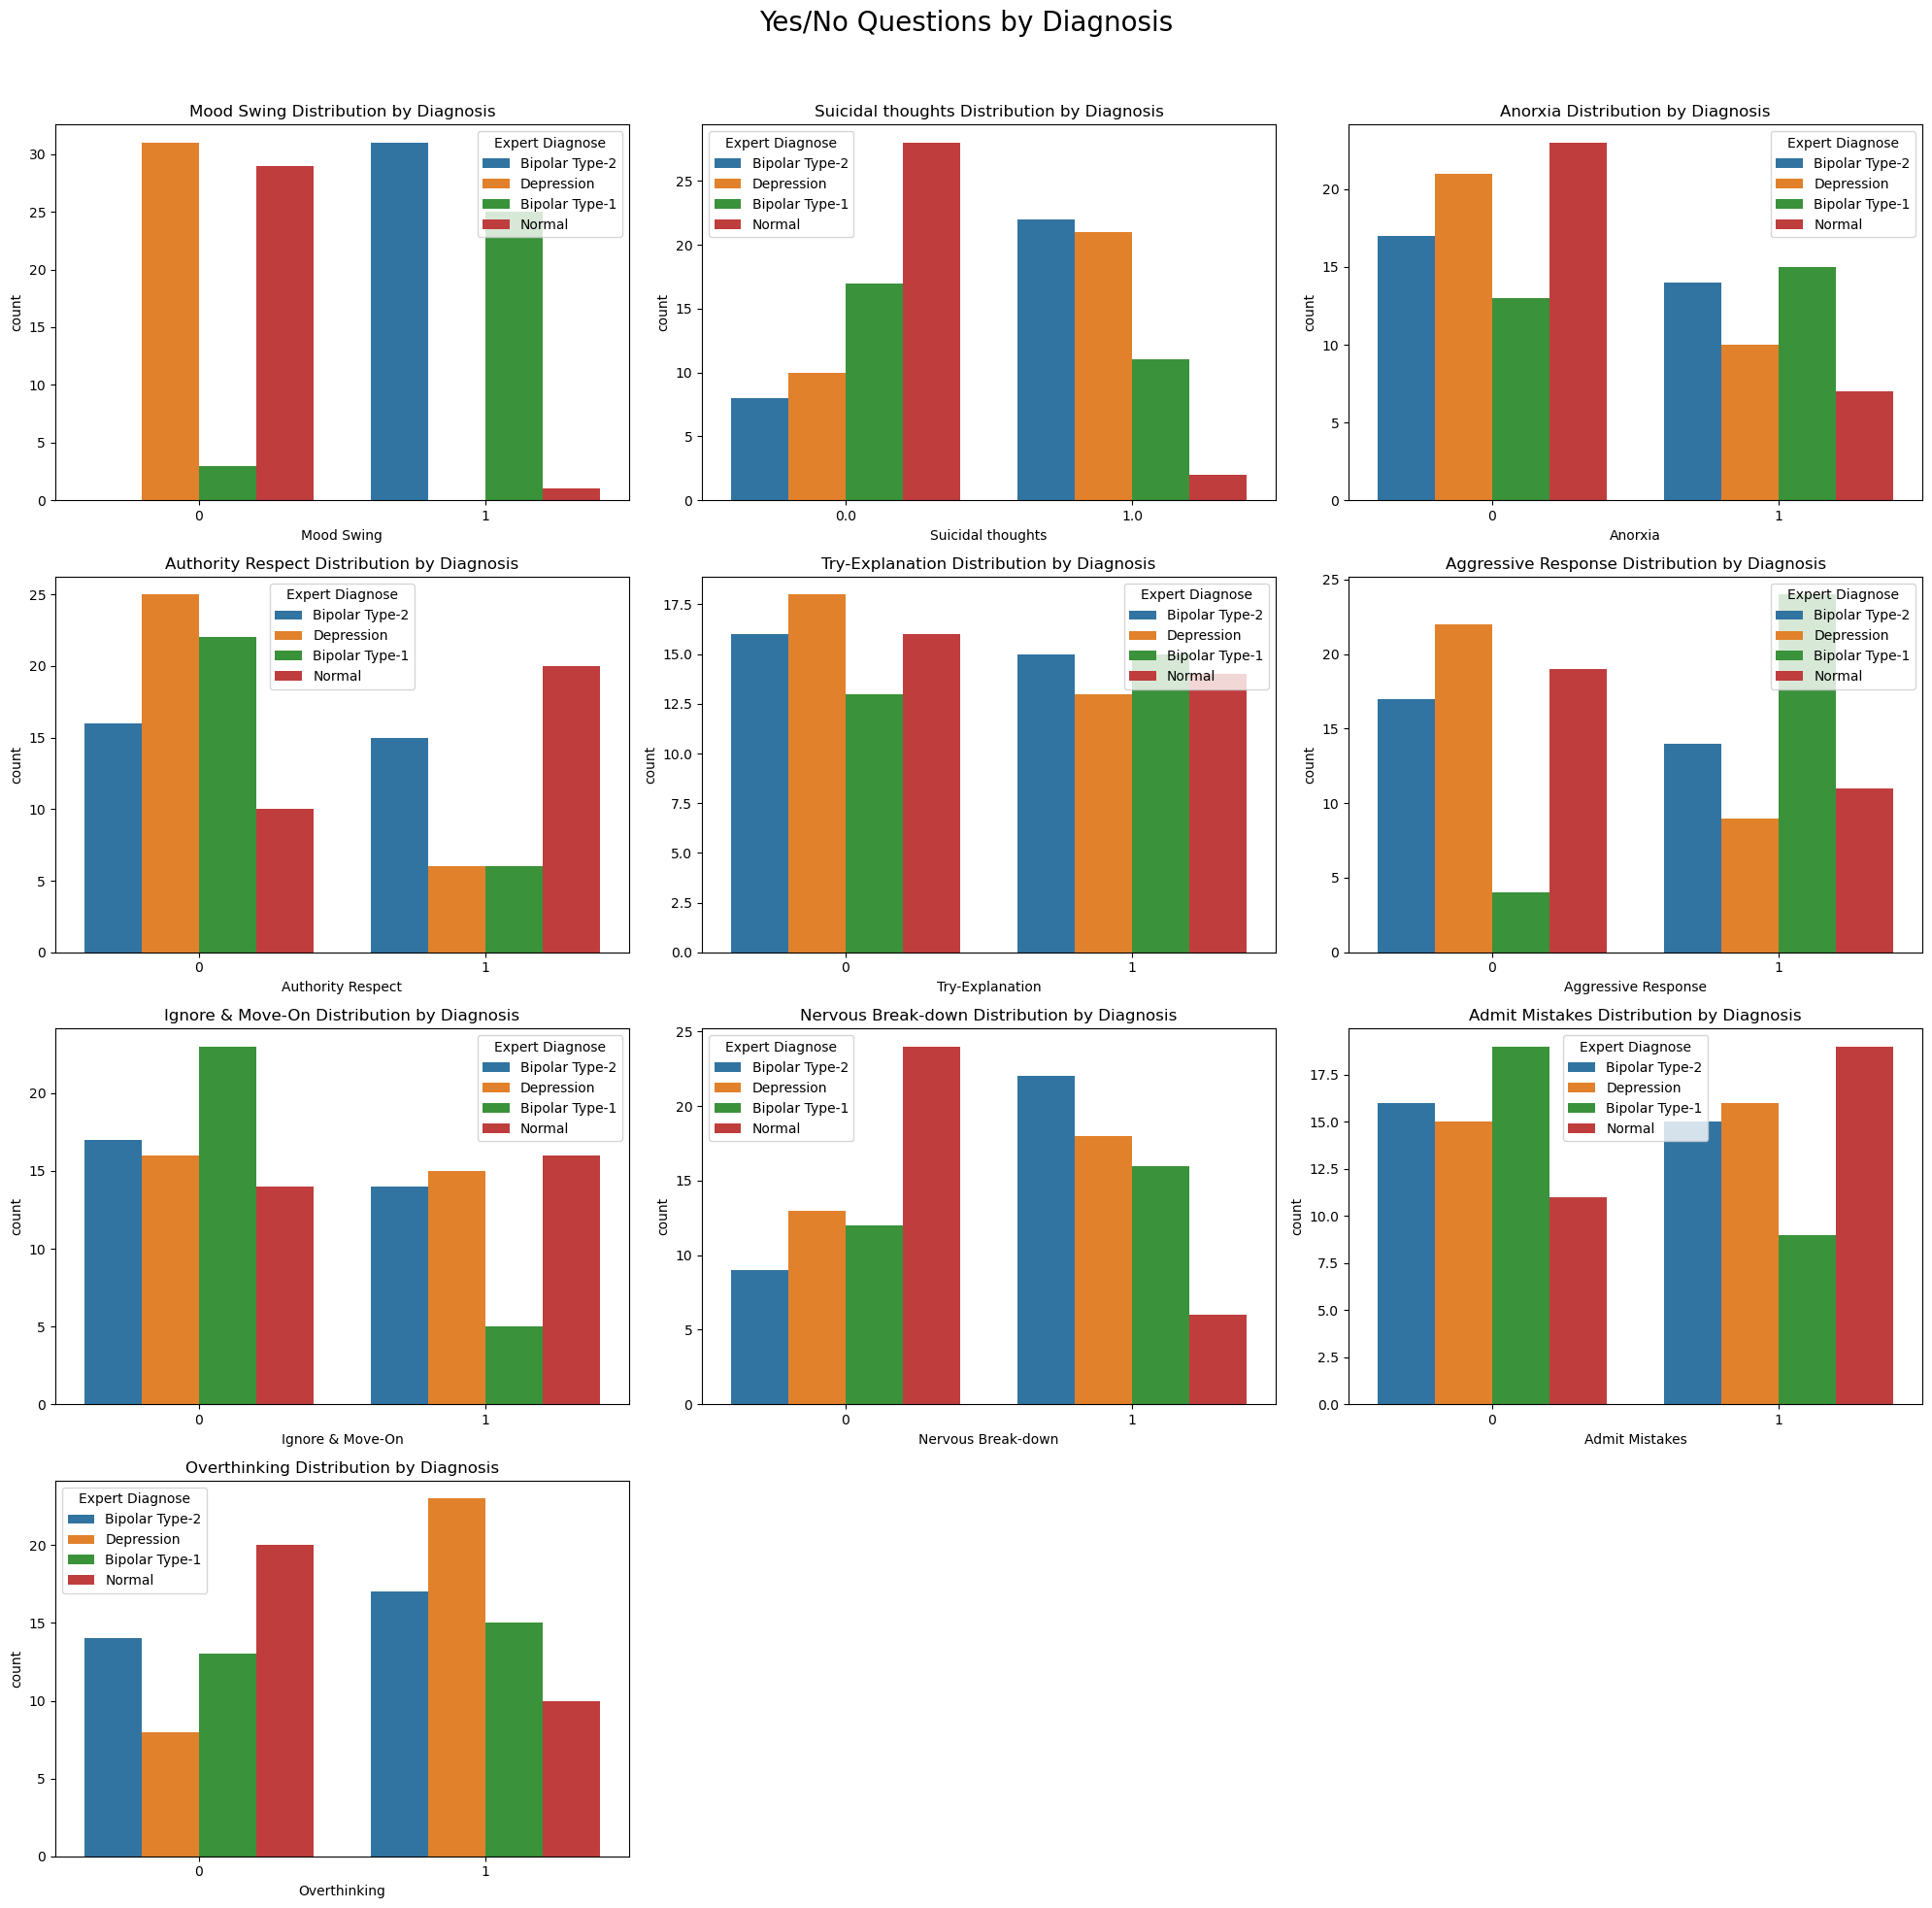

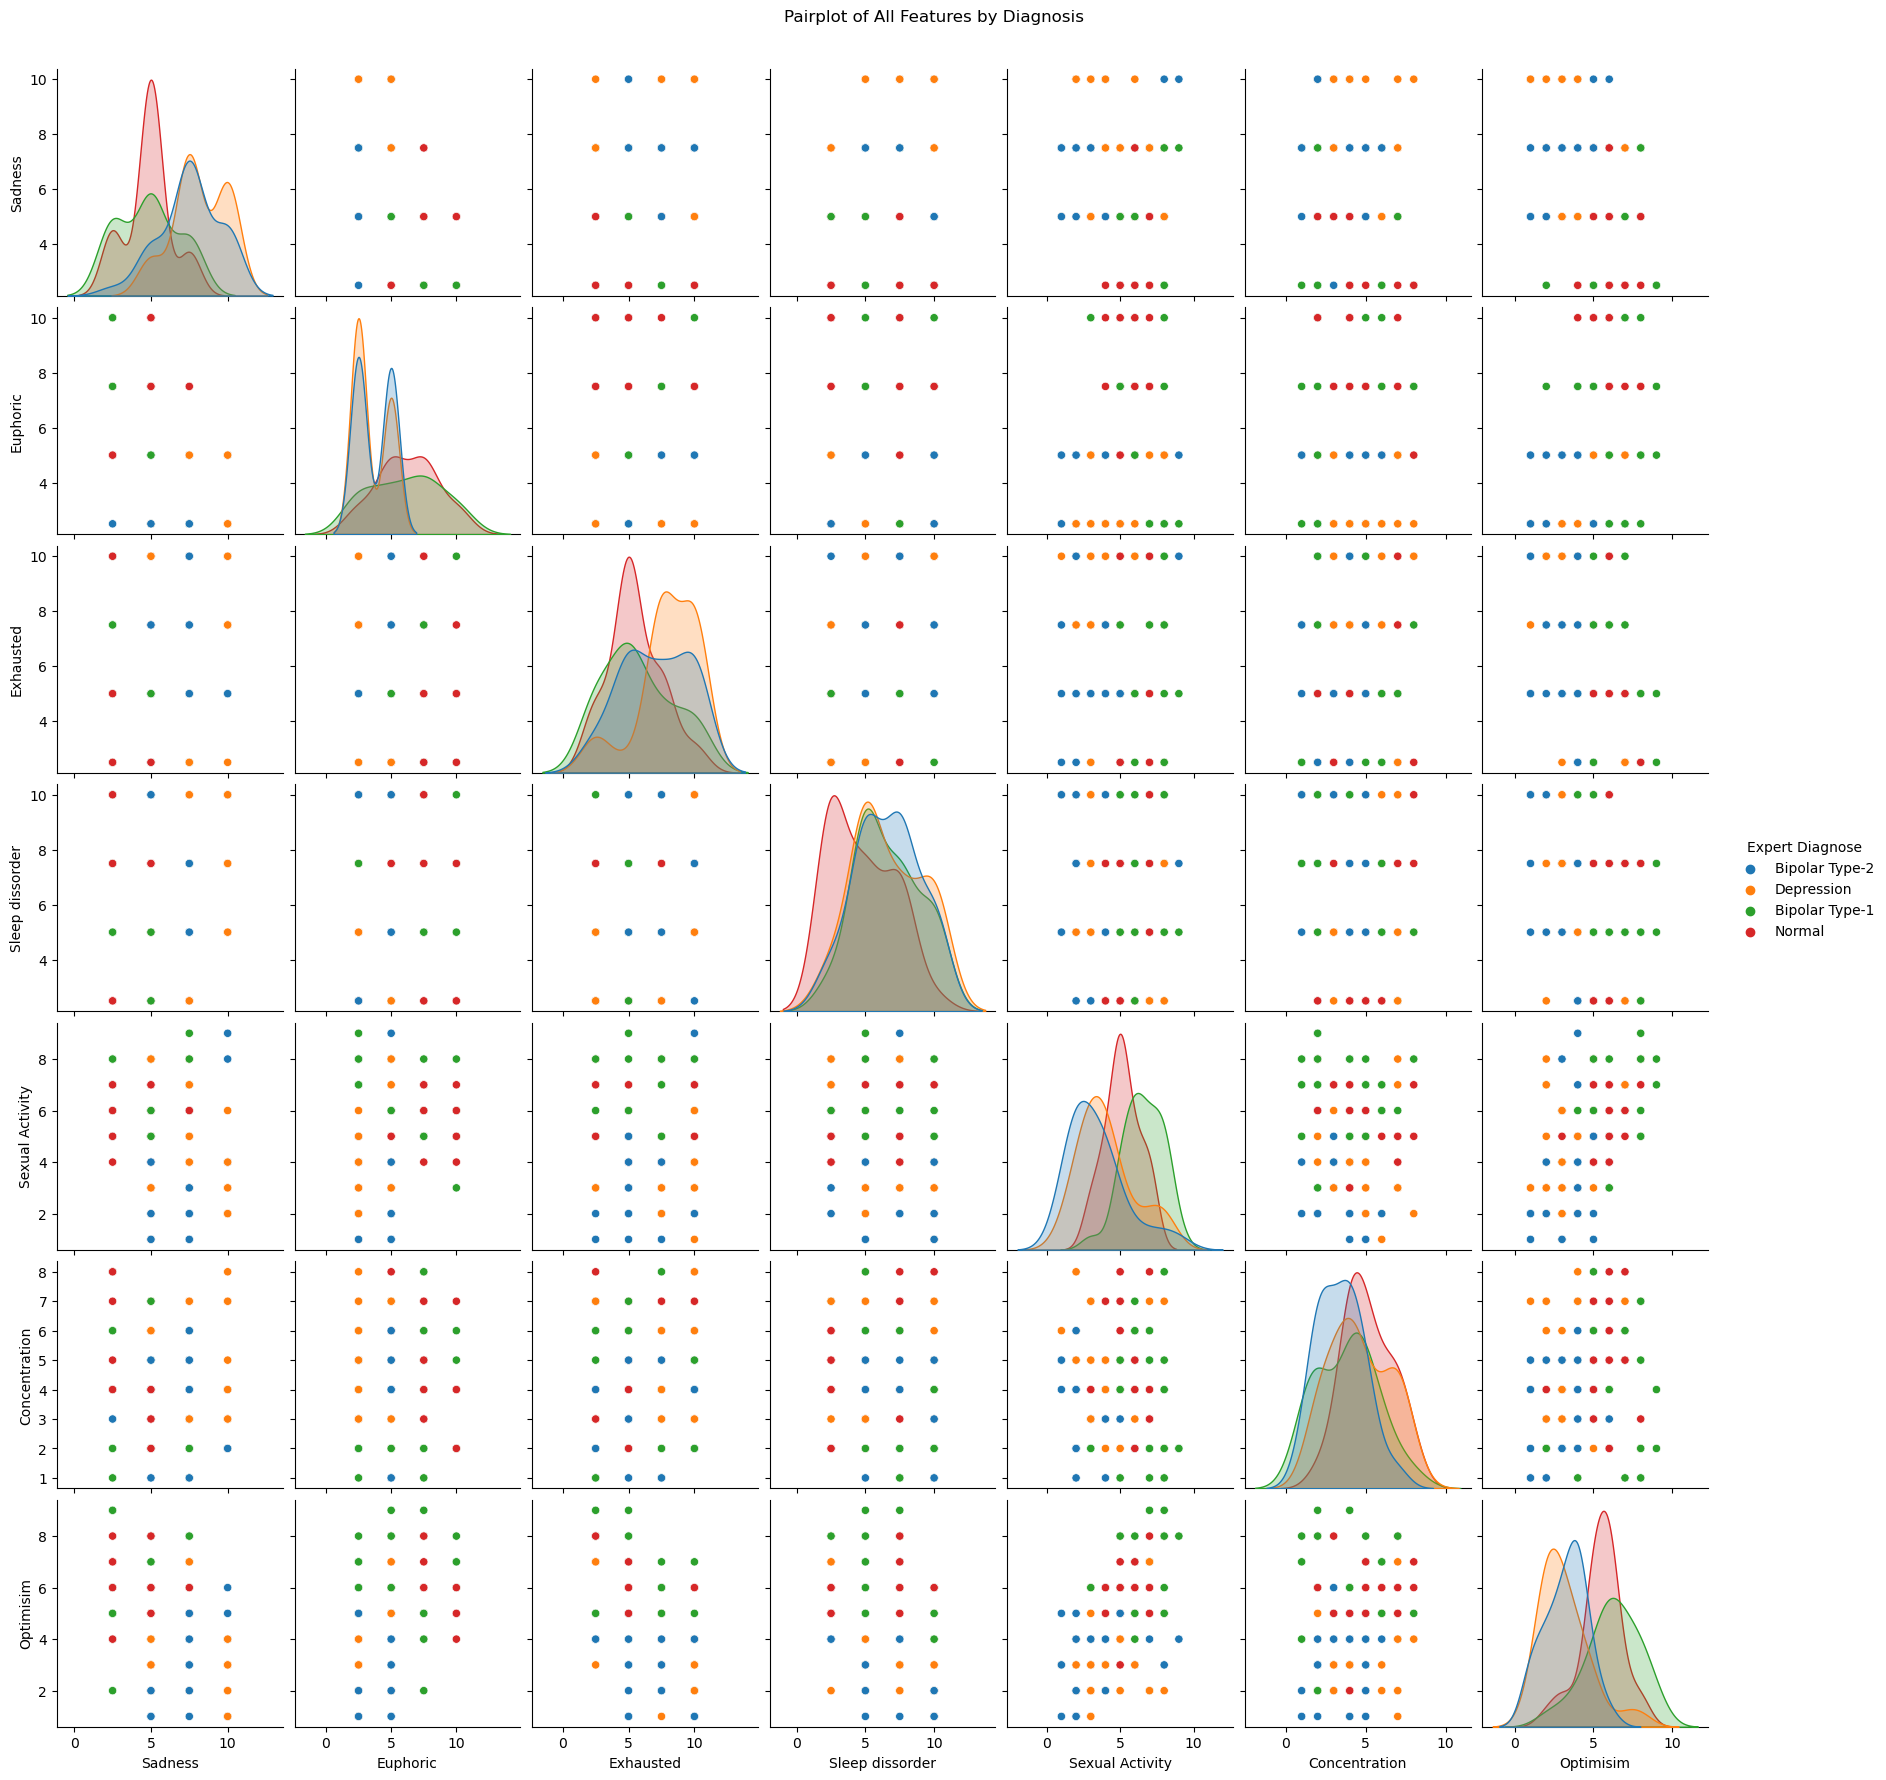

In [134]:
fig, axes = plt.subplots(nrows=(len(yes_no_columns) + 2) // 3, ncols=3, figsize=(20, 20))
fig.suptitle('Yes/No Questions by Diagnosis', fontsize=20)

for i, col in enumerate(yes_no_columns):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=data, x=col, hue='Expert Diagnose', ax=ax)
    ax.set_title(f'{col} Distribution by Diagnosis')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

sns.pairplot(data[non_yes_no_columns + ['Expert Diagnose']], hue='Expert Diagnose', diag_kind="kde")
plt.suptitle('Pairplot of All Features by Diagnosis', y=1.02)
plt.show()